<a href="https://colab.research.google.com/github/katherina-jiawen/InClassEcon441B/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the US Perminent Visas using zip extractor

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/UCLA/Econ 441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2.) Choose 4 features you think are important. Case_status is your target variable

In [ ]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [ ]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [ ]:
df.country_of_citizenship

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
374357    SOUTH KOREA
374358        VIETNAM
374359          INDIA
374360    SOUTH KOREA
374361          CHINA
Name: country_of_citizenship, Length: 374362, dtype: object

In [ ]:
df_select = df[["case_status", "class_of_admission",'agent_city','country_of_citizenship']]

# 3.) Clean your data for a decision tree

In [ ]:
X = pd.get_dummies(df_select, "class_of_admission",'agent_city','country_of_citizenship')
y = df["case_status"]

# 4.) Fit and plot a decision tree of depth X

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'class_of_admissionagent_cityCertified <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.5, 0.625, 'class_of_admissionagent_cityCertified-Expired <= 0.5\ngini = 0.377\nsamples = 192429\nvalue = [0, 148586, 25649, 18194]'),
 Text(0.3333333333333333, 0.375, 'class_of_admissionagent_cityDenied <= 0.5\ngini = 0.486\nsamples = 43843\nvalue = [0, 0, 25649, 18194]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 18194\nvalue = [0, 0, 0, 18194]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 25649\nvalue = [0, 0, 25649, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 148586\nvalue = [0, 148586, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 181933\nvalue = [181933, 0, 0, 0]')]

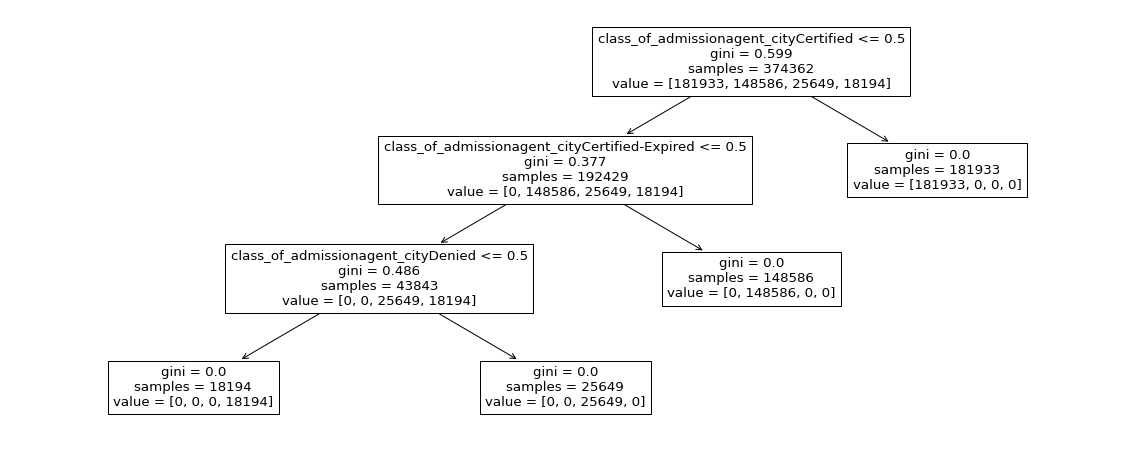

In [ ]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns )

# 5.) Write your interpretation of the largest (by sample size) leaf node

The largest leaf node is the node with sample size 25649， gini = 0.0, and value = [0,0,25649,0]. it satisfied when class of admission citydenied larger than 0.5. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
max_depths = [1,2,3]
outputs = []

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)#... Train test split

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  oos_accuracy = accuracy_score(y_test, y_pred)# CALCULATE Out of sample accuracy
  outputs.append(oos_accuracy)

In [ ]:
outputs

[0.8842746351583577, 0.9518293280146738, 1.0]

best max_depth among [1,2,3] is 3 becuase it gives highest accuracy